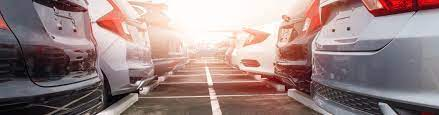

<h1><center>Car Price Prediction</center></h1>
<center> Eduardo Vargas Ferreira

# 1 - Introdução

O objetivo desta atividade é apresentar algumas análises descritivas, para que aos poucos tenhamos um maior repertório e visão crítica do problema.  

# 2 - Importando as bibliotecas necessárias para o EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

/home/eduardo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 3 - Lendo os dados e realizando a primeira limpeza na base

Note que essa primeira transformação na base é essencialmente uma limpeza para facilitar o entendimento do problema. Modificações mais elaboradas e sensíveis, como imputação de dados, transformação de variáveis, etc., devem ser feitas de forma mais estruturada através da validação cruzada, que veremos em aulas futuras. 

In [2]:
data = pd.read_csv("car.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 3.1 - Eliminando variáveis desnecessárias

Antes de começar a análise propriamente, algumas variáveis já podem ser eliminadas (outras eventualmente serão no decorrer das análises). Esta primeira limpeza é importante, especialmente quando trabalhamos com um grande volume de características, e esse excesso de informação pode dificultar nossa análise (de maneira geral). Por exemplo, veja que 'Market Category' tem várias categorias, o que pode acarretar em um aumento desnecessário de ruído. 

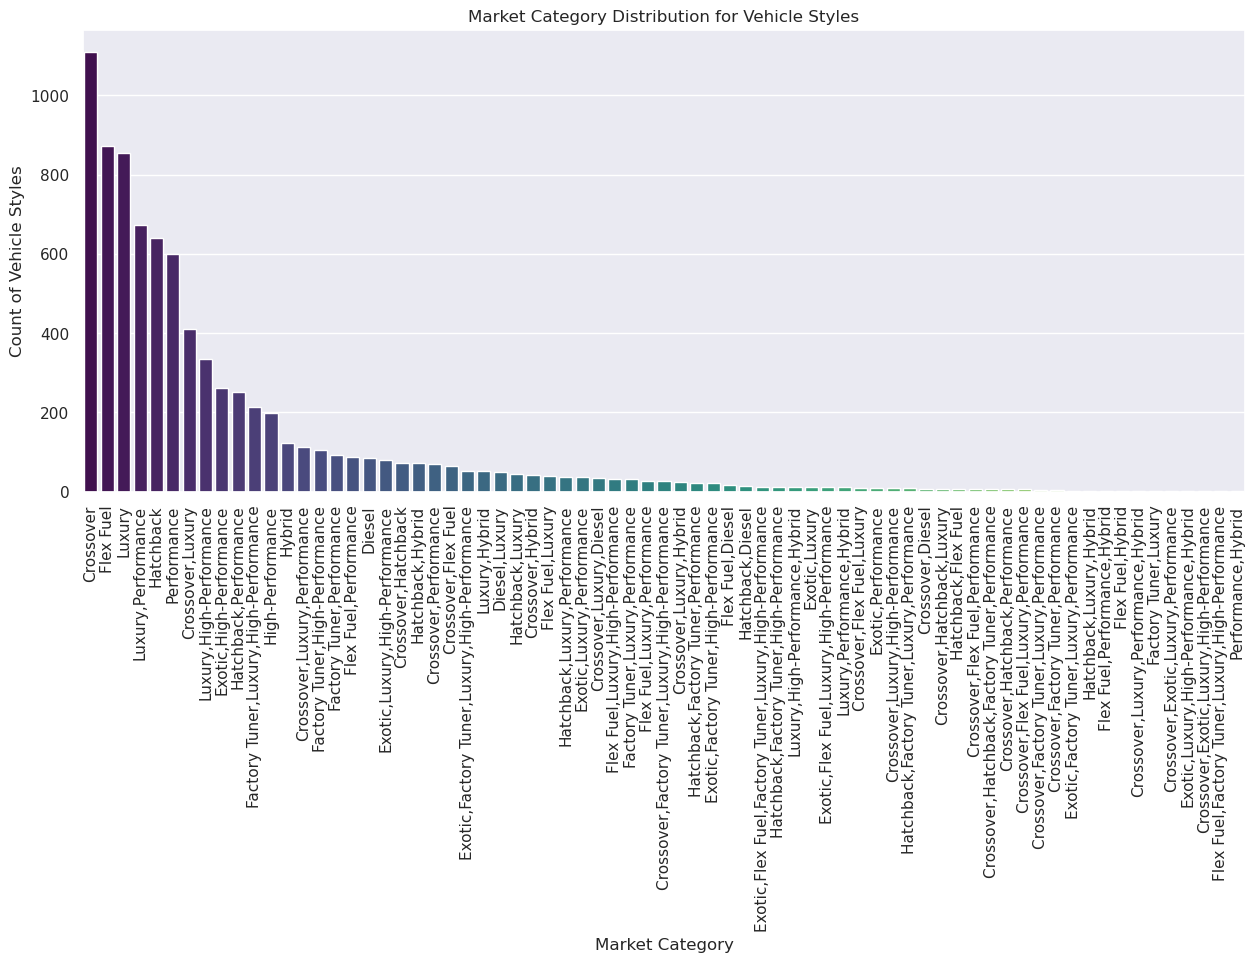

In [14]:
plt.figure(figsize=(15,6))

sns.countplot(data=data,x="Market Category", order=data["Market Category"].value_counts().index, palette="viridis")
plt.title("Market Category Distribution for Vehicle Styles")
plt.xlabel("Market Category")
plt.ylabel("Count of Vehicle Styles")
plt.xticks(rotation=90)

plt.show()

Além disso, essa variável apresenta um alto percentual de dados faltantes, o que acarretará em uma diminuição considerável das observações, caso o tratamento de missing seja eliminar a linha completa.  

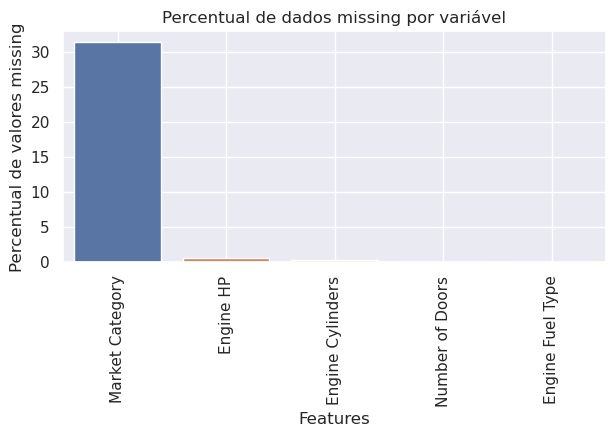

In [4]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]

fig, ax = plt.subplots(figsize=(7, 3))

sns.barplot(x = data_na.index, y=data_na, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Features', ylabel='Percentual de valores missing', 
       title='Percentual de dados missing por variável')
ax.grid(True)

plt.show()

Então, vamos eliminar as variáveis abaixo. Na prática, temos que fazer uma análise detalhada de cada uma delas, para tomarmos essa decisão. Aqui isso será feito apenas para exemplificar o processo.

In [5]:
data = data.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 
                  'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 3.2 - Alterando o título das variáveis

Além disso, quando analisamos os dados é importante termos atenção no título das variáveis, a fim de que eles sejam fáceis de compreender, sem precisar acessar um dicionário ou cometer um engano de interpretação. Por exemplo, a variável 'highway MPG' não é fácil depreender que se trata de Milhas/galão com veículos na estrada. Por isso, nós alteramos o nome de cada característica. 

In [6]:
data = data.rename(columns={"Make": "Marca", "Model": "Modelo", "Year": "Ano", "Engine HP": "CV", 
                            "Engine Cylinders": "Cilindros", "Transmission Type": "Transmissão", 
                            "Driven_Wheels": "Tipo de tração","highway MPG": "Milhas/galão estrada", 
                            "city mpg": "Milhas/galão cidade", "MSRP": "Preço" })
data.head(5)

,Marca,Modelo,Ano,CV,Cilindros,Transmissão,Tipo de tração,Milhas/galão estrada,Milhas/galão cidade,Preço
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 📝 Exercício: Investigue boas práticas na criação de bases de dados


Antes de começarmos a trabalhar com análise de dados, é fundamental entender como uma base de dados bem estruturada pode facilitar (ou dificultar!) todo o processo de modelagem, visualização e interpretação dos dados.


### Objetivo:

Pesquise sobre as **boas práticas na criação e organização de bases de dados**, abordando aspectos como:

- Nomeação de colunas (uso de maiúsculas/minúsculas, espaços, acentos, etc.)
- Padronização de valores categóricos
- Tratamento de dados ausentes
- Formatos recomendados para datas e números
- Consistência entre tabelas e variáveis
- Importância do dicionário de dados
- Problemas comuns que surgem quando essas práticas são ignoradas


Lembre-se de que a qualidade dos dados é um dos principais fatores que determinam o sucesso de um projeto de ciência de dados. Começar com dados mal estruturados significa gastar muito tempo corrigindo problemas que poderiam ter sido evitados!


### 3.3 - Eliminando linhas duplicadas

Geralmente, temos linhas "repetidas" na nossa base, ou seja, informações duplicadas, neste caso, carros com mesmas características. Estes dados "repetidos" podem trazer problemas durante o treinamento, causando morosidade ao processo (sem adicionar novas informações para o modelo), excesso de ruído, observação vazada, dentre outras dificuldades. Por isso, é importante remover tais observações. Neste caso, antes desta remoção tínhamos 11.914 linhas de dados, e depois de remover as duplicidades, passamos para 10.925 dados. Isto é, estávamos com 989 dados "repetidos".

In [ ]:
data.shape

(11914, 10)

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("Número de linhas duplicadas: ", duplicate_rows_data.shape)

Número de linhas duplicadas:  (989, 10)


In [ ]:
data = data.drop_duplicates()
data.head(5)

,Marca,Modelo,Ano,CV,Cilindros,Transmissão,Tipo de tração,Milhas/galão estrada,Milhas/galão cidade,Preço
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


# 4 - Algumas análises exploratórias

Veremos nessa seção algumas análises exploratórias. Entretanto, é importante enfatizar que todo esse processo deve ser realizado de forma controlada através da validação cruzada. Como ainda não aprendemos essa técnica, apenas mostraremos as análises, mas reforçando que na prática, qualquer intervenção nos dados deve ser feita em partições específicas dos dados. 

### 4.1 - Dados faltantes

Existem várias propostas para resolver o problema de dados ausentes. Em análises, futuras veremos outras abordagens, além dessa que apresentaremos aqui. Neste caso, vamos apenas descartar as linhas que apresentam valores faltantes, porque são somente 100 observações, dentre as 10000 disponíveis. O processo é semelhante ao que fizemos anteriormente para dados duplicados. Entretanto, essa - definitivamente - não é a melhor condução para solucionar o problema. Por exemplo, dependendo da característica do dado faltante, estaremos excluindo informações relevantes para a resposta. Ou ainda, note que uma observação faltante em uma variável apenas, faz com que se exclua toda a linha, e isso pode reduzir rapidamente os dados disponíveis.

In [10]:
print(data.isnull().sum())

Marca                    0
Modelo                   0
Ano                      0
CV                      69
Cilindros               30
Transmissão              0
Tipo de tração           0
Milhas/galão estrada     0
Milhas/galão cidade      0
Preço                    0
dtype: int64


In [11]:
data = data.dropna()   
data.count()

Marca                   10827
Modelo                  10827
Ano                     10827
CV                      10827
Cilindros               10827
Transmissão             10827
Tipo de tração          10827
Milhas/galão estrada    10827
Milhas/galão cidade     10827
Preço                   10827
dtype: int64

Outra proposta poderia ser estimar essas quantidades a partir das outras variáveis correlacionadas (veremos adiante um gráfico de correlação que ajudaria nesse processo). De forma mais específica, poderíamos, por exemplo, imputar a informação sobre ‘CV’ utilizando o consumo do carro, modelo, tipo de tração, etc. 

### 4.2 - Detecção outliers  

O outlier é um ponto ou conjunto de pontos que são diferentes dos demais. Na maioria das vezes é uma boa ideia detectar essas observações, e eventualmente removê-las (excluindo a linha inteira, por exemplo) ou tratá-las (corrigindo o valor, fixando em alguma quantidade, etc.). 

Os outliers são uma das principais razões para um modelo pouco preciso, porque essas observações discrepantes, geralmente, dificultam o aprendizado dos algoritmos, e por vezes funcionam como uma "alavanca" incorreta para o modelo. Por outro lado, pode ser que exatamente esse comportamento dessoante sirva de informação relevante para uma estimativa da resposta. Por isso, não é sempre que o outlier atrapalha nossas analises, e toda alteração na base deve ser feita com cautela. 

Frequentemente, outliers são inicialmente visualizados usando gráficos como os box-plots. 

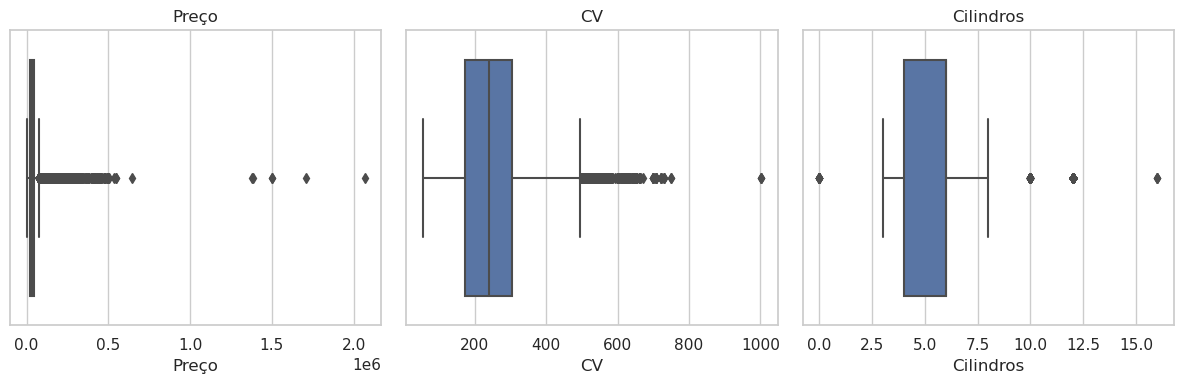

In [12]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Box plot 1
sns.boxplot(ax=axes[0], x=data['Preço'])
axes[0].set_title('Preço')

# Box plot 2
sns.boxplot(ax=axes[1], x=data['CV'])
axes[1].set_title('CV')

# Box plot 3
sns.boxplot(ax=axes[2], x=data['Cilindros'])
axes[2].set_title('Cilindros')

# Set the layout
plt.tight_layout()

# Display the plot
plt.show()

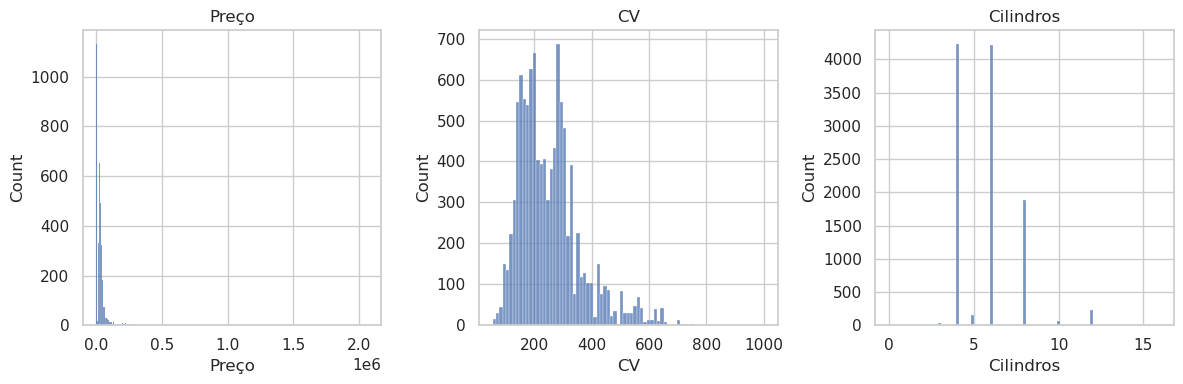

In [13]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Box plot 1
sns.histplot(ax=axes[0], x=data['Preço'])
axes[0].set_title('Preço')

# Box plot 2
sns.histplot(ax=axes[1], x=data['CV'])
axes[1].set_title('CV')

# Box plot 3
sns.histplot(ax=axes[2], x=data['Cilindros'])
axes[2].set_title('Cilindros')

# Set the layout
plt.tight_layout()

# Display the plot
plt.show()

Neste exemplo, a detecção e remoção de outliers será feita através da técnica de IQR score (interquartile range). O IQR é o primeiro quartil subtraído do terceiro quartil. 

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


KeyboardInterrupt



Neste caso, pode-se eliminar as observações fora de um intervalo baseado nessa amplitude, ou fixar esses dados em determinados valores. Por exemplo, preços acima de um valor específico são atribuídos uma quantidade fixa (e.g. carros acima de 500 mil recebem o preço de 500 mil). Nesta análise, não vamos nos preocupar com os resultados desse processo, mas sim na aplicação das técnicas. Existem outras abordagens mais comuns e refinadas, para mais detalhes, veja por exemplo [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

In [41]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

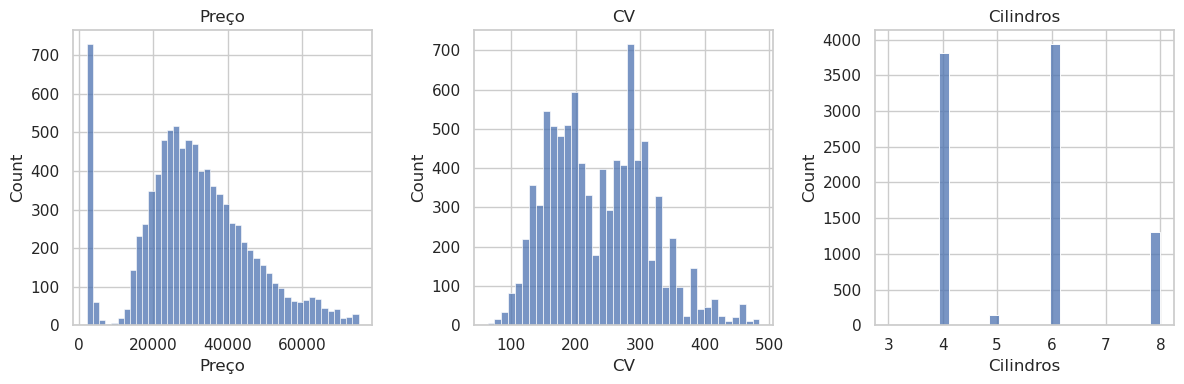

In [50]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Box plot 1
sns.histplot(ax=axes[0], x=data['Preço'])
axes[0].set_title('Preço')

# Box plot 2
sns.histplot(ax=axes[1], x=data['CV'])
axes[1].set_title('CV')

# Box plot 3
sns.histplot(ax=axes[2], x=data['Cilindros'])
axes[2].set_title('Cilindros')

# Set the layout
plt.tight_layout()

# Display the plot
plt.show()

Note que para o caso do preço, podemos também transformar os dados aplicando uma função, como o logaritmo (isso além de tratar os outliers). Assim, pode-se obter uma resposta mais simétrica, ou próxima da normalidade (o que pode interessante, dependendo do modelo a se considerar).

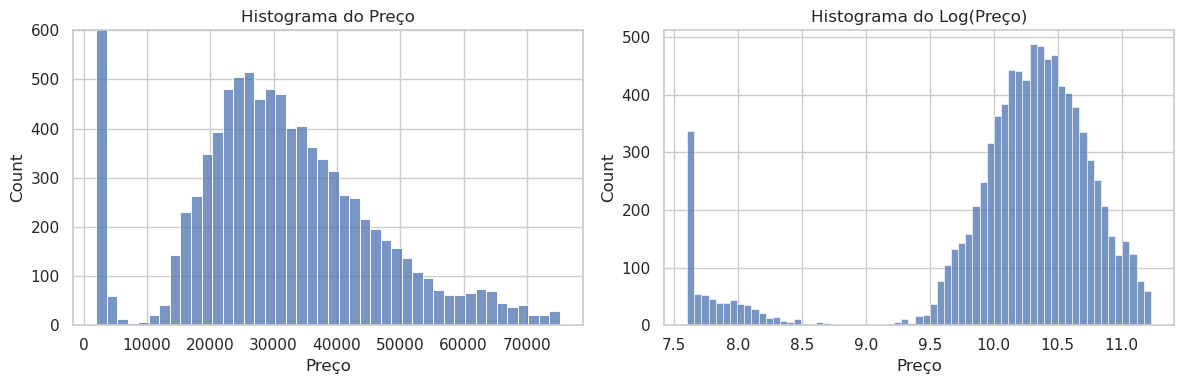

In [42]:
sns.set(style="whitegrid")

# Calcula o logarithm do 'Preço'
log_preco = np.log(data['Preço'])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot 1: Histograma do 'Preço'
ax = sns.histplot(data['Preço'], ax=axes[0])
axes[0].set_title('Histograma do Preço')

# Limit the y-axis to 800 and x-axis to 500000
ax.set_ylim(0, 600)

# Plot 2: Histograma do logarithm do 'Preço'
sns.histplot(log_preco, ax=axes[1])
axes[1].set_title('Histograma do Log(Preço)')

# Set the layout
plt.tight_layout()

# Display the plot
plt.show()

### 4.3 - Gráficos avaliando variáveis conjuntamente

Na maioria das vezes, precisamos entender o comportamento das variáveis de forma conjunta, afinal é assim que elas estarão no problema. O Heat Maps é um tipo de gráfico útil para entender a correlação entre as variáveis. O mapa de calor do nosso problema é apresentado abaixo. Note que o preço depende principalmente do ‘CV’ e do ano do carro. Além disso, o consumo do automóvel na cidade é uma informação mais importante do que o consumo na estrada para a precificação. Veja ainda que a varável ‘CV’ é correlacionada com todas as outras variáveis. Esta é uma informação importante, já que ‘CV’ foi uma das característica com dados faltantes. Ou seja, é possível prever essa informação através das demais. 

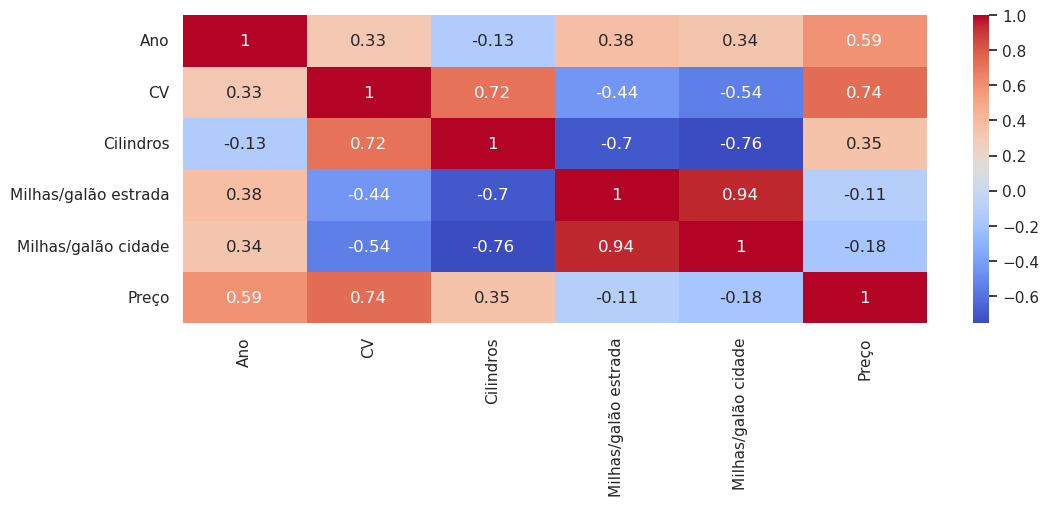

In [43]:
plt.figure(figsize=(12, 4))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

Outra possibilidade de análise é através do histograma. Por exemplo, analisando as principais fábricas de automóveis, sabemos qual marca tem o maior número de carros disponíveis (eventualmente uma maior oferta pode resultar em uma redução do preço). Pode-se ainda, avaliar determinadas marcas (e preços) pela sua escassez no mercado, como a Hummer, Ferrari, etc. Alternativamente, podemos estudar os modelos mais abundantes, dentro de cada marca, como a Silverado, quando avaliamos especificamente a Chevrolet no ano de 2016.

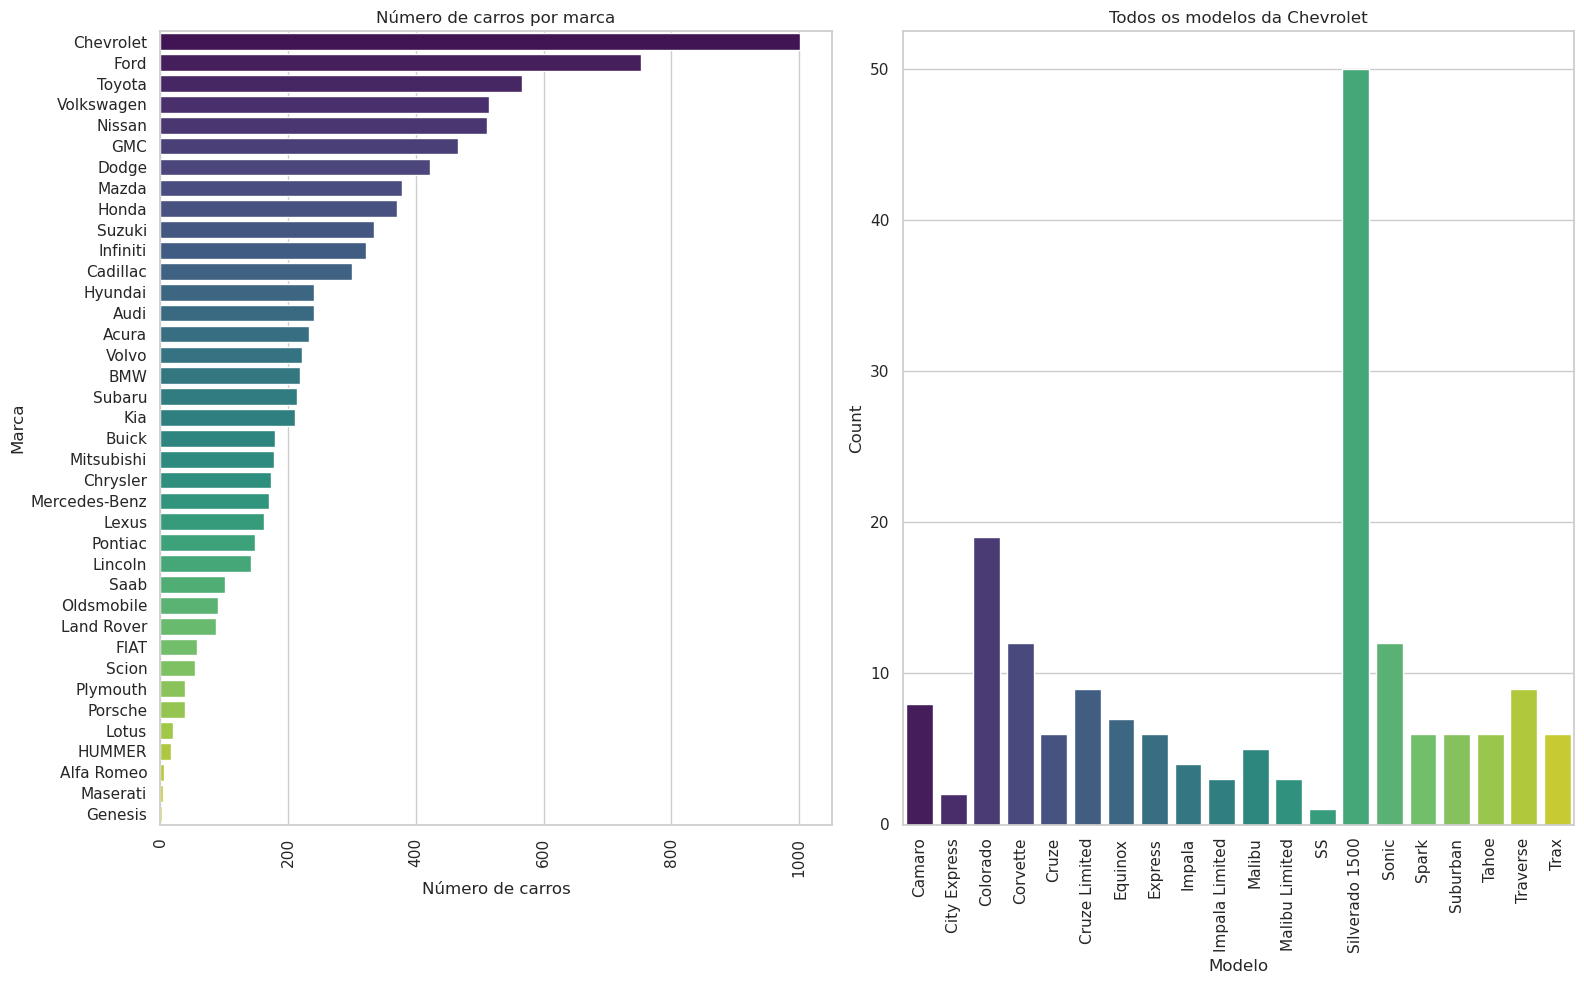

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

# Plot 1: Número de carros por marca
data_marca = data["Marca"].value_counts()
ax1 = sns.countplot(data=data, y="Marca", order=data_marca.index, palette="viridis", ax=axes[0])
ax1.set_title("Número de carros por marca")
ax1.set_xlabel('Número de carros')
ax1.set_ylabel('Marca')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot 2: Todos os modelos da Chevrolet
mask = data[(data["Marca"] == "Chevrolet") & (data["Ano"] == 2016)]
data1 = mask.groupby(["Marca", "Modelo"]).size().reset_index(name="Count")
ax2 = sns.barplot(data=data1, x="Modelo", y="Count", palette="viridis", ax=axes[1])
ax2.set_title("Todos os modelos da Chevrolet")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Podemos ainda relacionar mais de uma variável para estabelecer outras relações. No caso abaixo, temos os box-plots dos preços dos carro segundo a marca. Com isso podemos avaliar a variação do preço entre cada categoria, bem como aquelas em que os valores dos automóveis são consideravelmente mais altos (como a Cadillac) ou mais baixos (como a Suzuki).

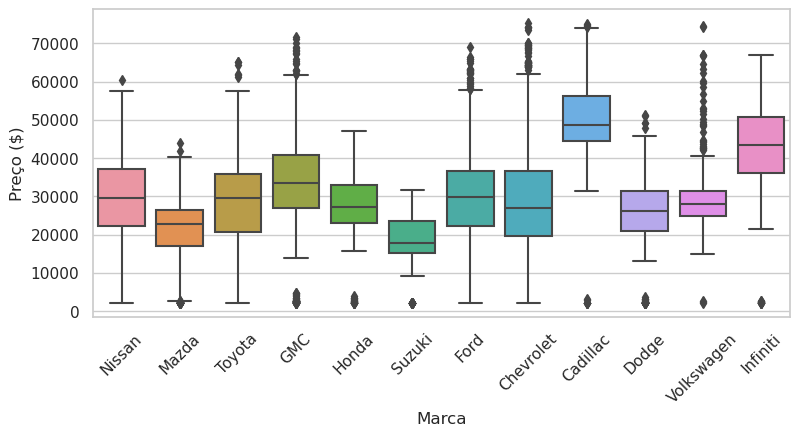

In [45]:
# Seleção dos top 12 
top_marcas = data['Marca'].value_counts().head(12).index.tolist()

# Criando o DataFrame 
top_marca_data = data[data['Marca'].isin(top_marcas)]

# Box plot
fig, ax = plt.subplots(figsize=(9, 4))

sns.boxplot(x='Marca', y='Preço', data=top_marca_data, ax=ax)
ax.set_xlabel('Marca')
ax.set_ylabel('Preço ($)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Veja que comparando a variável ‘CV’ e ‘Preço’, os valores mais altos de ‘CV’ apresentam uma variabilidade maior dos preços. Isso significa que as estimativas de preços, considerando CV mais altos, provavelmente apresentarão maiores oscilações nos resultados.  

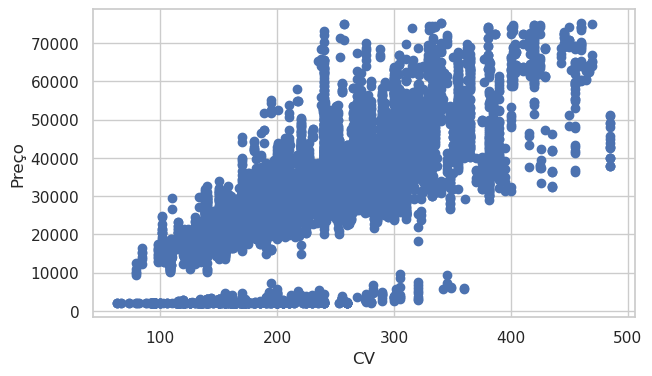

In [46]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(data['CV'], data['Preço'])
ax.set_xlabel('CV')
ax.set_ylabel('Preço')
plt.show()

Note ainda que temos algumas observações abaixo de 10000 dólares. Podemos compreender melhor que observações são essas. Por exemplo, incluindo a variável 'Ano', notamos que, em grande maioria, essas observações referem-se à automóveis abaixo do ano 2000. Ou seja, carros anteriores à 2000, provavelmente, apresentarão um preço inferior à 10 mil dólares, independente do ‘CV’. 

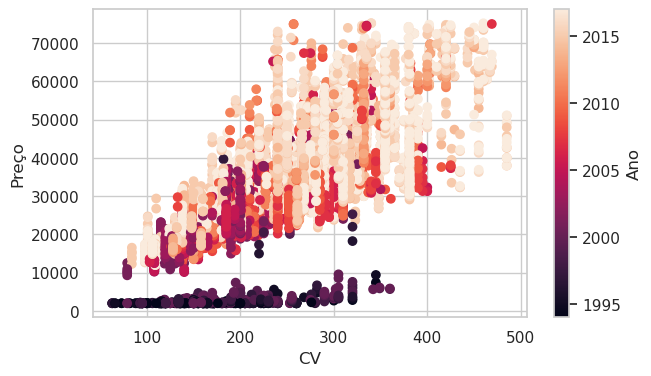

In [47]:
fig, ax = plt.subplots(figsize=(7, 4))
scatter = ax.scatter(data['CV'], data['Preço'], c=data['Ano'])
ax.set_xlabel('CV')
ax.set_ylabel('Preço')

# Colorindo de acordo com o ano
cbar = plt.colorbar(scatter)
cbar.set_label('Ano')

plt.show()

Esse resultado também pode ser observado no gráfico abaixo. Note que, nesse caso, estamos considerando o preço médio.

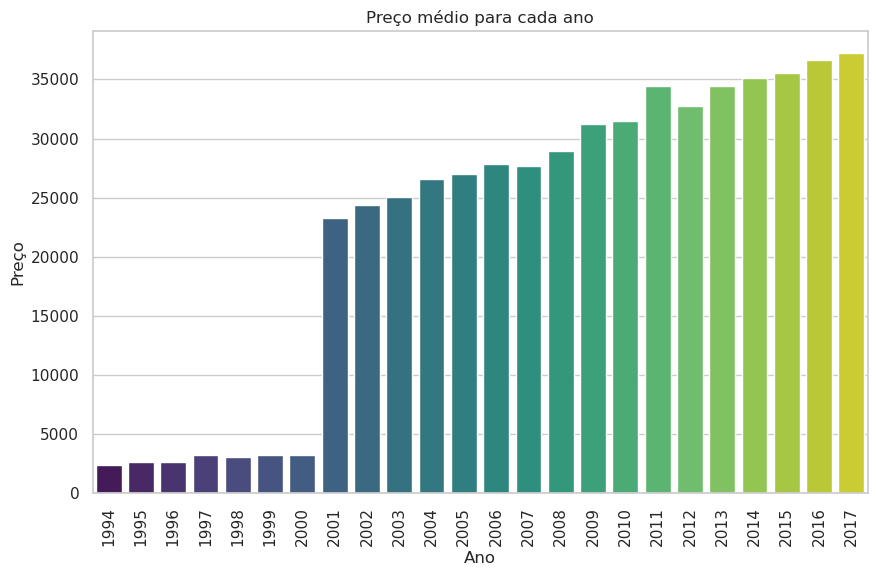

In [48]:
data_temp = round(data.groupby("Ano")["Preço"].mean().reset_index(), 2)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_temp, x="Ano", y="Preço", palette="viridis")

plt.title("Preço médio para cada ano")
plt.xticks(rotation=90)

plt.show()

Além disso, sabendo as informações anteriores, conseguimos entender o gráfico abaixo, que relaciona o 'Preço' com 'Cilindros'. Facilmente inferimos que a maioria dos carros com 3 cilindros são do ano de 2000 ou anterior. 

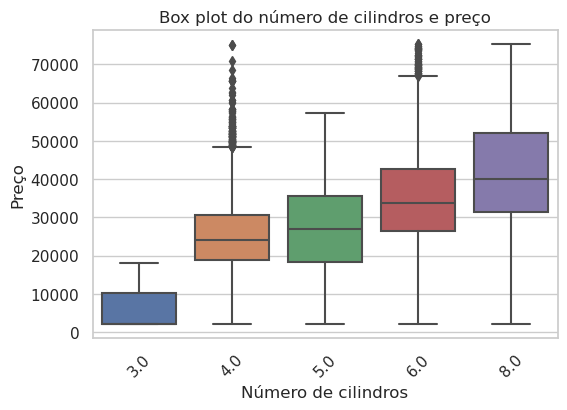

In [49]:
# Variaveis para o gráfico
engine_cylinders_price_data = pd.concat([data['Preço'], data['Cilindros']], axis=1)

# Box plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x='Cilindros', y='Preço', data=engine_cylinders_price_data, ax=ax)
ax.set_title('Box plot do número de cilindros e preço')
ax.set_xlabel('Número de cilindros')
ax.set_ylabel('Preço')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 5 - Conclusão

Em resumo, acima estão algumas das etapas (bem gerais) envolvidas na análise exploratória de dados. Ainda há muito mais por vir, especialmente como aplicar essas abordagens na prática. Mas, por enquanto, essa foi uma ideia de como executar um EDA, considerando quaisquer conjuntos de dados. 

Nas próximas análises, veremos exemplos mais específicos como tratamento de missing e outlier, além de outras etapas como a validação cruzada no processo de transformação dos dados (validando essas mudanças). Futuramente aplicaremos ainda métodos não-supervisionados na criação e visualização das variáveis.